# 第一章 图像数据增强

&emsp;&emsp;深度学习需要大量的样本进行训练，训练一个优秀的模型通常需要上万张图片，然而，我们收集到的数据往往有限，并且图片越多，标注的成本也越大。另一方面，深度神经网络很容易出现过拟合的现象，具体来说就是在训练集上表现很好，但是在测试集上的表现却不尽人意。图像数据增强可以在一定程度上解决这两个问题，不仅能增加图片的数量，还能增强模型的泛化能力，使模型不容易出现过拟合的情况。图像数据增强通常有以下几种方式：图像水平翻转、垂直翻转、平移、旋转、亮度调整、加噪声等。

## 1.1 图像插值算法

&emsp;&emsp;在图像处理中，平移变换、旋转变换以及放缩变换是一些基础且常用的操作。这些几何变换并不改变图象的象素值，只是在图象平面上进行象素的重新排列。在一幅输入图象$[u, v] $中，灰度值仅在整数位置上有定义。然而，输出图象[x，y]的灰度值一般由处在非整数坐标上的$[u', v']$值来决定。这就需要插值算法来进行处理，常见的插值算法有最近邻插值、双线性插值和三次样条插值。

In [3]:
# 图像在计算机中的存储
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lenna.jpg') # bgr
img

array([[[139, 158, 219],
        [141, 160, 221],
        [140, 161, 223],
        ...,
        [114, 171, 240],
        [ 93, 149, 220],
        [ 65, 121, 192]],

       [[139, 158, 219],
        [139, 160, 221],
        [140, 161, 223],
        ...,
        [123, 176, 243],
        [ 96, 149, 216],
        [ 64, 117, 184]],

       [[138, 159, 221],
        [137, 160, 222],
        [137, 160, 222],
        ...,
        [130, 174, 237],
        [102, 146, 209],
        [ 71, 115, 178]],

       ...,

       [[ 12,  17,  15],
        [  7,  12,  10],
        [ 16,  22,  21],
        ...,
        [ 48,  77, 146],
        [ 47,  76, 145],
        [ 47,  76, 145]],

       [[ 10,  15,  13],
        [  8,  13,  11],
        [ 20,  26,  25],
        ...,
        [ 52,  80, 151],
        [ 53,  81, 152],
        [ 54,  82, 153]],

       [[  9,  14,  12],
        [  9,  14,  12],
        [ 23,  29,  28],
        ...,
        [ 50,  78, 149],
        [ 53,  81, 152],
        [ 56,  84, 155]]

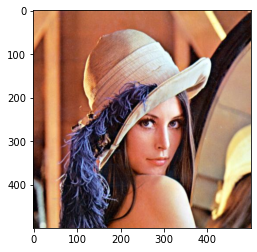

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 1.1.1 最近邻插值

&emsp;&emsp;最近邻插值，是指将目标图像中的点，对应到源图像中后，找到$\color{#FF0000}{最相邻的整数点}$，作为插值后的输出。

<div align=center><img width="30%" height="30%" src="https://img-blog.csdnimg.cn/20200412101740312.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zOTk0MDUxMg==,size_16,color_FFFFFF,t_70#pic_center"/></div>



&emsp;&emsp;如上图所示，目标图像中的某点投影到原图像中的位置为点P,此时易知，$f(P) = f(Q11)$.

**一个例子：**

&emsp;&emsp;如下图所示，将一幅3X3的图像放大到4X4，用$f(x, y)$表示目标图像，$h(x, y)$表示原图像，我们有如下公式：

$$
\begin{array}{c}
f(dst_{X}, dst_{Y}) = h(\frac{dst_{X}src_{Width}}  {dst_{Width}}, \frac{dst_{Y}src_{Height}} {dst_{Height}})
\end{array}
$$

$$
\begin{array}{c}
f(0,0)=h(0,0) \\
f(0,1)=h(0,0.75)=h(0,1) \\
f(0,2)=h(0,1.50)=h(0,2) \\
f(0,3)=h(0,2.25)=h(0,2) \\
...\\
\end{array}
$$

<div align=center><img width="50%" height="50%" src="https://img-blog.csdnimg.cn/20200412101854853.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zOTk0MDUxMg==,size_16,color_FFFFFF,t_70#pic_center"/></div>

**缺点：**
用该方法作放大处理时，在图象中可能出现明显的块状效应


<div align=center><img width="150" height="150" src="https://img-blog.csdnimg.cn/20200412102932888.png#pic_center"/></div>



### 1.1.2 双线性插值

&emsp;&emsp;在讲双线性插值之前先看以一下**线性插值**，线性插值多项式为：

$$
f(x)=a_{1} x+a_{0}
$$

<div align=center><img width="50%" height="50%" src="https://img-blog.csdnimg.cn/20200412103208674.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zOTk0MDUxMg==,size_16,color_FFFFFF,t_70#pic_center"/></div>



$$
y=y_{0}+\left(x-x_{0}\right) \frac{y_{1}-y_{0}}{x_{1}-x_{0}}=\frac{x-x_1}{x_0-x_1}y_0 + \frac{x-x_0}{x_1-x_0}y_1
$$


**双线性插值**

如图，已知$Q_{12}，Q_{22}，Q_{11}，Q_{21}$，但是要插值的点为$P$点，这就要用双线性插值了，首先在$x$轴方向上，对$R_1$和$R_2$两个点进行插值，这个很简单，然后根据$R_1$和$R_2$对$P$点进行插值，这就是所谓的双线性插值。在数学上，双线性插值是有两个变量的插值函数的线性插值扩展，其核心思想是在两个方向分别进行一次线性插值。

<div align=center><img width="50%" height="50%" src="https://img-blog.csdnimg.cn/20200420182244952.png"/></div>

设$Q_{11} = (x_1, y_1)、Q_{12} = (x_1, y_2), Q_{21} = (x_2, y_1) 以及 Q_{22} = (x_2, y_2)$
首先在$x$方向进行线性插值，得到

$$f(R_1)\approx \frac{x-x_2}{x_1-x_2}f(Q_{11})+\frac{x-x_1}{x_2-x_1}f(Q_{21})$$
$$f(R_2)\approx \frac{x-x_2}{x_1-x_2}f(Q_{12})+\frac{x-x_1}{x_2-x_1}f(Q_{22})$$

然后在$y$方向进行线性插值，得到：

$$f(P)\approx \frac{y-y_2}{y_1-y_2}f(R_1)+\frac{y-y_1}{y_2-y_1}f(R_{2})$$

$\color{#FF0000}{将f(R_1)、f(R_2)带入上式得：}$


$$f(P)\approx \frac{y-y_2}{y_1-y_2} \frac{x-x_2}{x_1-x_2}f(Q_{11}) +  \frac{y-y_2}{y_1-y_2}\frac{x-x_1}{x_2-x_1}f(Q_{21}) +\frac{y-y_1}{y_2-y_1}\frac{x-x_2}{x_1-x_2}f(Q_{12})+\frac{y-y_1}{y_2-y_1}\frac{x-x_1}{x_2-x_1}f(Q_{22})$$

这就是双线性插值最后的结果，由于图像双线性插值只会用相邻的4个点，因此上述公式的分母都是1,

&emsp;&emsp;整理得：

$$f(P)\approx (y-y_2)(x-x_2)f(Q_{11}) - (y-y_2)(x-x_1)f(Q_{21}) - (y-y_1)(x-x_2)f(Q_{12} + (y-y_1)(x-x_1)f(Q_{22})$$


**用最近邻插值的例子算一下：**

$$
\begin{array}{c}
f(0,0)=h(0,0) =56\\
f(1,0)=h(0.75,0)=0.75\cdot(23-56) +56=31.25\\
f(2,0)=h(1.50,0)=0.5\cdot(15-23) + 23=19 \\
f(3,0)=h(2.25,0)=0.25\cdot??? \\
...\\
\end{array}
$$

由上面的计算可以知道，刚刚推导出的式子是不能处理边界情况的，并且我们用代码验证一下这个例子：

In [5]:
import numpy as np
import cv2

arr = np.array([[56, 23, 15], [65, 32, 78], [12, 45, 62]], dtype=np.uint8)
amplifier = cv2.resize(arr, dsize=None, fx=4/3, fy=4/3, interpolation = cv2.INTER_LINEAR)
print(amplifier)

[[56 35 20 15]
 [62 41 38 54]
 [45 40 50 72]
 [12 33 51 62]]


可以看到，输出结果和我们手算的结果并不一样，这是因为opencv做了一些优化处理，简单说就是将源图像和目标图像的几何中心对齐 ，把伸缩公式：

$$
f(dst_{X}, dst_{Y}) = h(\frac{dst_{X}src_{Width}}  {dst_{Width}}, \frac{dst_{Y}src_{Height}} {dst_{Height}})
$$

改为：

$$\color{#FF0000}{f(dst_{X}, dst_{Y}) = h[\frac{(dst_{X}+0.5)*src_{Width} }  {dst_{Width}}- 0.5, \frac{(dst_{Y}+0.5)*src_{Height}} {dst_{Height}}-0.5]}$$

另外，如果超出边界，Opencv采用的是最接近它的那组数据点做线性插值。

接下来我们重新手算一遍：

$$
\begin{array}{c}
f(0,0)  =h(-0.125,-0.125) =h(0,0)=56\\
f(0,1)=h(-0.125,0.625)=h(0,0.625)=0.625\cdot(23-56) +56=35.375\approx 35\\
f(0,2)=h(-0.125,1.375)=h(0,1.375)=0.375\cdot(15-23) + 23=20 \\
f(0,3)=h(-0.125,2.125)=h(0, 2)=15 \\
f(1,0)=h(0.625,-0.125)=h(0.625,0)=0.625\cdot(65-56) +56=61.625\approx 62\\
f(1,1)=h(0.625,0.625)=h(0.625,0.625)\\
=0.625\cdot(65-56) +0.625\cdot (23-56) + 0.625 \cdot 0.625 \cdot(56+32-65-23)+56\\
=41\\
...\\
\end{array}
$$



**代码实现：**

**函数原型：**

>cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

**参数：**

| 参数          | 描述                       |
| ------------- | -------------------------- |
| src           | 【必需】原图像             |
| dsize         | 【必需】输出图像所需大小   |
| fx            | 【可选】沿水平轴的比例因子 |
| fy            | 【可选】沿垂直轴的比例因子 |
| interpolation | 【可选】插值方式           |

**插值方式：**

|                  |                            |
| ---------------- | -------------------------- |
| cv.INTER_NEAREST | 最近邻插值                 |
| cv.INTER_LINEAR  | 双线性插值                 |
| cv.INTER_CUBIC   | 基于4x4像素邻域的3次插值法 |
| cv.INTER_AREA    | 基于局部像素的重采样       |

>通常，缩小使用cv.INTER_AREA，放缩使用cv.INTER_CUBIC(较慢)和cv.INTER_LINEAR(较快效果也不错)。默认情况下，所有的放缩都使用cv.INTER_LINEAR。

imread(filename, flags=None)

| flags            | 解释                                                         |
| ---------------- | ------------------------------------------------------------ |
| IMREAD_UNCHANGED | 指定用图片的原来格式打开，即以不改变图片的方式打开，图片是彩色就是彩色，图片是灰度图像就是灰度图像 |
| IMREAD_GRAYSCALE | 指定用灰度图像的方式打开图片，即将原始图像转化为灰度图像再打开 |
| IMREAD_COLOR     | 指定用彩色图像打开图片                                       |

In [6]:
import cv2 

img = cv2.imread('./lenna.jpg', cv2.IMREAD_UNCHANGED) # bgr

print('Original Dimensions : ',img.shape)

scale_percent = 30     
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR) # 3*3

fx = 1.5
fy = 1.5

resized1 = cv2.resize(resized, dsize=None, fx=fx, fy=fy, interpolation = cv2.INTER_NEAREST)

resized2 = cv2.resize(resized, dsize=None, fx=fx, fy=fy, interpolation = cv2.INTER_LINEAR)
print('Down Scale Dimensions : ',resized.shape)
print('Enlarged Dimensions : ',resized1.shape)

cv2.imshow("Original image", img)
cv2.imshow("Down Scale image", resized)
cv2.imshow("INTER_NEAREST image", resized1)
cv2.imshow("INTER_LINEAR image", resized2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (500, 500, 3)
Down Scale Dimensions :  (150, 150, 3)
Enlarged Dimensions :  (225, 225, 3)


## albumentations数据扩增

albumentations是基于OpenCV的快速训练数据增强库，拥有非常简单且强大的可以用于多种任务（分割、检测）的接口，易于定制且添加其他框架非常方便。

albumentations也是计算机视觉数据竞赛中最常用的库：

- GitHub： [https://github.com/albumentations-team/albumentations](https://link.zhihu.com/?target=https%3A//github.com/albumentations-team/albumentations)
- 示例：[https://github.com/albumentations-team/albumentations_examples](https://link.zhihu.com/?target=https%3A//github.com/albumentations-team/albumentations_examples)

与OpenCV相比albumentations具有以下优点：

- albumentations支持的操作更多，使用更加方便；
- albumentations可以与深度学习框架（Keras或Pytorch）配合使用；
- albumentations支持各种任务（图像分流）的数据扩增操作

albumentations它可以对数据集进行逐像素的转换，如模糊、下采样、高斯造点、高斯模糊、动态模糊、RGB转换、随机雾化等；也可以进行空间转换（同时也会对目标进行转换），如裁剪、翻转、随机裁剪等。

albumentations还可以组合多个数据扩增操作得到更加复杂的数据扩增操作：

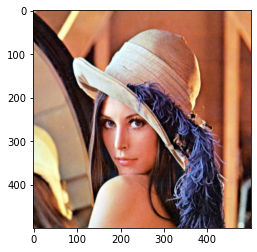

In [7]:
import albumentations as A
from matplotlib import pyplot as plt

img = cv2.imread('./lenna.jpg')

aug = A.HorizontalFlip(p=1)(image=img)
plt.imshow(aug['image'][:, :, ::-1])

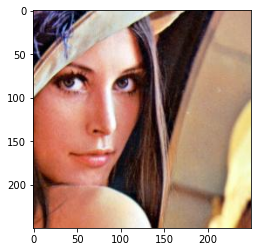

In [10]:
aug = A.RandomCrop(p=1, width=250, height=250)(image=img)
plt.imshow(aug['image'][:, :, ::-1])

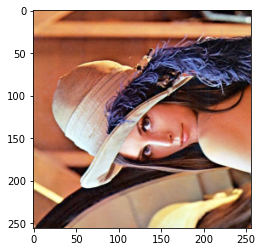

In [11]:
trfm = A.Compose([A.Resize(256, 256),
                 A.HorizontalFlip(p=0.5),
                 A.VerticalFlip(p=0.5),
                 A.RandomRotate90()]
                )

aug = trfm(image=img)
img_aug = aug['image']
plt.imshow(img_aug[:,:, ::-1])